In [1]:
%tensorflow_version 1.x
import sys
sys.path.append('/content/drive/My Drive/Colab_Work/PPM/nn/conv')
from shallownet import ShallowNet
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
sys.path.append('/content/drive/My Drive/Colab_Work/PPM/preprocessing')
from imagetoarraypreprocessor import ImageToArrayPreprocessor
sys.path.append('/content/drive/My Drive/Colab_Work/PPM/preprocessing')
from simplepreprocessor import SimplePreprocessor
sys.path.append('/content/drive/My Drive/Colab_Work/PPM/datasets')
from simpledatasetloader import SimpleDatasetLoader
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [5]:
print("[INFO] loading images...")
%cd /content/drive/My\ Drive/Colab_Work
imagePaths = list(paths.list_images('animals'))
sp = SimplePreprocessor(32, 32)
iap = ImageToArrayPreprocessor()
sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
(data, labels) = sdl.load(imagePaths, verbose=500)
data = data.astype("float")/255.0

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25,  random_state=42)

trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

[INFO] loading images...
/content/drive/My Drive/Colab_Work
[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000


In [7]:
print("[INFO] compiling model...")
opt = SGD(lr=0.005)
model = ShallowNet.build(width=32, height=32, depth=3, classes=3)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


In [8]:
print("[INFO] training network...")
H = model.fit(trainX,  trainY, validation_data=(testX, testY), batch_size=32, epochs=100, verbose=1)

[INFO] training network...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 2250 samples, validate on 750 samples
Epoch 1/100





2250/2250 [==============================] - 12s 5ms/step - loss: 1.0167 - acc: 0.4627 - val_loss: 0.9830 - val_acc: 0.4933
Epoch 2/100
2250/2250 [==============================] - 0s 222us/step - loss: 0.9353 - acc: 0.5236 - val_loss: 0.8833 - val_acc: 0.5760
Epoch 3/100
2250/2250 [==============================] - 0s 219us/step - loss: 0.8894 - acc: 0.5613 - val_loss: 0.8759 - val_acc: 0.5547
Epoch 4/100
2250/2250 [==============================] - 0s 213us/step - loss: 0.8690 - acc: 0.5756 - val_loss: 0.9053 - val_acc: 0.5253
Epoch 5/100
2250/2250 [==============================] - 0s 213us/step - loss: 0.8450 - acc: 0.5827 - val_loss: 0.8256 - val_acc: 0.5893
Epoch 6/100
2250/2250 [==============================] - 0s 213us/step - loss: 0.8266 - acc: 0.5942 - val_loss: 0.8395 - val_acc: 0.5613
Epo

In [9]:
print("[INFO] serializing network...")
%cd /content/drive/My\ Drive/Colab_Work
model.save('shallownet_weights.hdf5')

[INFO] serializing network...
/content/drive/My Drive/Colab_Work


In [10]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=["cat","dog","panda"]))

[INFO] evaluating network...
              precision    recall  f1-score   support

         cat       0.61      0.65      0.63       249
         dog       0.57      0.61      0.59       239
       panda       0.87      0.76      0.81       262

    accuracy                           0.68       750
   macro avg       0.68      0.67      0.68       750
weighted avg       0.69      0.68      0.68       750



/content/drive/My Drive/Colab_Work


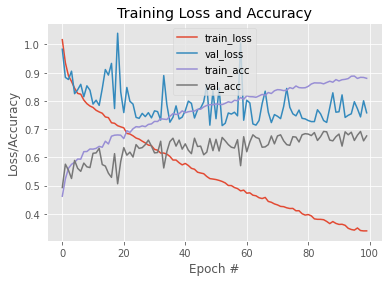

In [12]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
%cd /content/drive/My\ Drive/Colab_Work
plt.savefig('shallownet_animals_train_test_plot.png')